In [1]:
import random
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#numpy.set_printoptions(threshold=numpy.nan)
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
data = unpickle("cifar-10-batches-py/data_batch_1")
test = unpickle("cifar-10-batches-py/test_batch")
lables = unpickle("cifar-10-batches-py/batches.meta")[b'label_names']

x = tf.placeholder(tf.float32, [None, 1023])

W_ih = tf.Variable(tf.random_uniform([1023, 16], maxval=1))
b_ih = tf.Variable(tf.random_uniform([16], maxval=1))

h1 = tf.nn.relu(tf.matmul(x, W_ih)+b_ih)

W_hh = tf.Variable(tf.random_uniform([16, 16], maxval=1))
b_hh = tf.Variable(tf.random_uniform([16], maxval=1))
h2 = tf.nn.relu(tf.matmul(h1, W_hh)+b_hh)

W_ho = tf.Variable(tf.random_uniform([16, 10], maxval=1))
b_ho = tf.Variable(tf.random_uniform([10], maxval=1))

y = tf.matmul(h2, W_ho)+b_ho
result = tf.nn.sigmoid(y)

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.RMSPropOptimizer(0.25, momentum=0.5).minimize(cross_entropy)

In [4]:
trainings_data = []
trainings_labels = []
for i in range(len(data[b'labels'])):
    img_dat_r = data[b'data'][i][0:1023]
    img_dat_g = data[b'data'][i][1024:2047]
    img_dat_b = data[b'data'][i][2048:3071]
    img_dat = np.zeros(len(img_dat_r))
    for j in range(len(img_dat_r)):
        img_dat[j] = 0.3*img_dat_r[j] +0.6*img_dat_g[j] +0.1*img_dat_b[j]
    label_dat = np.zeros(10)
    label_dat[data[b'labels'][i]] = 1
    
    trainings_data.append(img_dat)
    trainings_labels.append(label_dat)
    
    
test_data = []
test_labels = []
for i in range(len(test[b'labels'])):
    img_dat_r = test[b'data'][i][0:1023]
    img_dat_g = test[b'data'][i][1024:2047]
    img_dat_b = test[b'data'][i][2048:3071]
    img_dat = np.zeros(len(img_dat_r))
    for j in range(len(img_dat_r)):
        img_dat[j] = 0.3*img_dat_r[j] +0.6*img_dat_g[j] +0.11*img_dat_b[j]
    label_dat = np.zeros(10)
    label_dat[test[b'labels'][i]] = 1
    
    test_data.append(img_dat)
    test_labels.append(label_dat)
    

In [10]:
init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
sess.run(init)

for i in range(5001):
    if i%10 == 0:
        te = cross_entropy.eval(feed_dict={x: test_data, y_: test_labels})
        print("\rstep %d, training error %g"%(i, te), end="")
        if te < 0.0001: # 99.999% accuracy is good enough
            break

    sess.run(train_step, feed_dict={x: trainings_data, y_: trainings_labels})
print("\nTraining complete!")

step 5000, training error 0.325445Training complete!


Color images? n


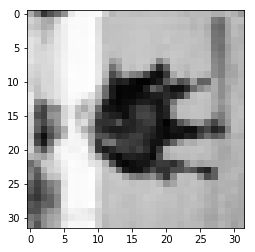

b'airplane'  	 0.117023  	 0.0
b'automobile'  	 0.0985603  	 0.0
b'bird'  	 0.0945753  	 0.0
b'cat'  	 0.0977722  	 0.0
b'deer'  	 0.103681  	 0.0
b'dog'  	 0.0903232  	 0.0
b'frog'  	 0.113905  	 0.0
b'horse'  	 0.0918861  	 1.0
b'ship'  	 0.100604  	 0.0
b'truck'  	 0.100467  	 0.0



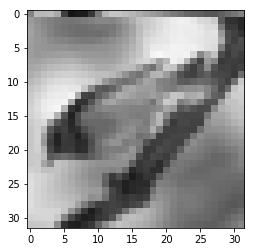

b'airplane'  	 0.117023  	 0.0
b'automobile'  	 0.0985603  	 0.0
b'bird'  	 0.0945753  	 1.0
b'cat'  	 0.0977722  	 0.0
b'deer'  	 0.103681  	 0.0
b'dog'  	 0.0903232  	 0.0
b'frog'  	 0.113905  	 0.0
b'horse'  	 0.0918861  	 0.0
b'ship'  	 0.100604  	 0.0
b'truck'  	 0.100467  	 0.0



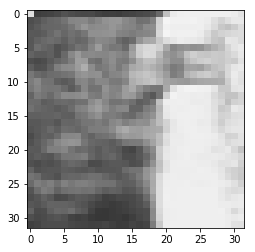

b'airplane'  	 0.117023  	 0.0
b'automobile'  	 0.0985603  	 0.0
b'bird'  	 0.0945753  	 0.0
b'cat'  	 0.0977722  	 0.0
b'deer'  	 0.103681  	 1.0
b'dog'  	 0.0903232  	 0.0
b'frog'  	 0.113905  	 0.0
b'horse'  	 0.0918861  	 0.0
b'ship'  	 0.100604  	 0.0
b'truck'  	 0.100467  	 0.0



In [27]:
res = sess.run(result, feed_dict={x: test_data})
image = random.randint(0,len(res))
use_color_image = True if (input("Color images? ") == "y") else False

for j,e in enumerate(res[image:image+3]):
    data = []
    for i in range(32):
        tmp = []
        for k in range(32):
            if use_color_image:
                img_dat_r = test[b'data'][image+j][32*k+i-1]
                img_dat_g = test[b'data'][image+j][1024+32*k+i-1]
                img_dat_b = test[b'data'][image+j][2048+32*k+i-1]
                tmp.append([img_dat_r,img_dat_g,img_dat_b])
            else:
                tmp.append([test_data[image+j][32*k+i-1]/255, test_data[image+j][32*k+i-1]/255, test_data[image+j][32*k+i-1]/255])
        data.append(tmp)
    dat = np.array(data, dtype=np.float32)
    plt.imshow(dat);
    plt.show()
    
    for i in range(10):
        print(lables[i], " \t", e[i], " \t", test_labels[image+j][i])
    print()